# Multi Linear Regression

## 1. Import Libraries and Data

Pada studi kasus analisis regresi linier berganda akan digunakan data variabel dependen (y) waste, sedangkan untuk variabel indepeden (X) adalah beberapa variabel lain selain variabel dependen/waste, dengan rincian keterangan variabel seperti berikut :

- transaction_date = tanggal transaksi
- store_address = alamat store
- store_city = kota store
- product = nama produk
- current_wholesale_price	= harga grosir
- start_of_day	= target penjualan produk
- quantity_sold	= jumlah produk terjual
- waste	= jumlah produk tersisa
- current_retail_price_value	= harga jual
- waste_percentage	= persentase produk tersisa

Pada studi kasus kali ini akan dicari tahu seberapa besar pengaruh masing-masing variabel dependen (X) terhadap variabel independen (y).

In [153]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [154]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [155]:
path = "/content/gdrive/My Drive/DataFiles/ml_regresi_linear/Data/"

In [156]:
os.listdir(path)

['Data Description.txt',
 'CoffeeShop_Dataset.db',
 'Inventory Coffee Shop Clean.csv',
 'Total Transaksi Customer Coffee Shop Clean.csv',
 'estimated_monthly_income_test.csv',
 'estimated_monthly_income_train.csv']

In [157]:
data = pd.read_csv(path + 'Inventory Coffee Shop Clean.csv')

In [158]:
data

,Unnamed: 0,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste,current_retail_price_value,waste_percentage,sold_value,target_trx,waste_value
0,0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%,3.50,56,28.00,63.0,35.00
1,1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%,3.25,33,39.00,58.5,19.50
2,2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%,3.75,56,30.00,67.5,37.50
3,3,2019-04-01,32-20 Broadway,Long Island City,Ginger Scone,2.11,$3.25,48,9,39,81%,3.25,81,29.25,156.0,126.75
4,4,2019-04-01,32-20 Broadway,Long Island City,Almond Croissant,2.44,$3.75,18,9,9,50%,3.75,50,33.75,67.5,33.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,302,2019-04-27,687 9th Avenue,New York,Hazelnut Biscotti,2.28,$3.50,18,1,17,94%,3.50,94,3.50,63.0,59.50
303,303,2019-04-27,687 9th Avenue,New York,Cranberry Scone,2.11,$3.25,18,4,14,78%,3.25,78,13.00,58.5,45.50
304,304,2019-04-27,687 9th Avenue,New York,Chocolate Croissant,2.44,$3.75,18,2,16,89%,3.75,89,7.50,67.5,60.00
305,305,2019-04-27,687 9th Avenue,New York,Ginger Scone,2.11,$3.25,48,19,29,60%,3.25,60,61.75,156.0,94.25


In [159]:
data = data.drop(['Unnamed: 0', 'current_retail_price', '% waste'], axis=1)

In [160]:
data

,transaction_date,store_address,store_city,product,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage,sold_value,target_trx,waste_value
0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,18,8,10,3.50,56,28.00,63.0,35.00
1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,18,12,6,3.25,33,39.00,58.5,19.50
2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,18,8,10,3.75,56,30.00,67.5,37.50
3,2019-04-01,32-20 Broadway,Long Island City,Ginger Scone,2.11,48,9,39,3.25,81,29.25,156.0,126.75
4,2019-04-01,32-20 Broadway,Long Island City,Almond Croissant,2.44,18,9,9,3.75,50,33.75,67.5,33.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2019-04-27,687 9th Avenue,New York,Hazelnut Biscotti,2.28,18,1,17,3.50,94,3.50,63.0,59.50
303,2019-04-27,687 9th Avenue,New York,Cranberry Scone,2.11,18,4,14,3.25,78,13.00,58.5,45.50
304,2019-04-27,687 9th Avenue,New York,Chocolate Croissant,2.44,18,2,16,3.75,89,7.50,67.5,60.00
305,2019-04-27,687 9th Avenue,New York,Ginger Scone,2.11,48,19,29,3.25,60,61.75,156.0,94.25


## 2. Exploratory Data Analysis (EDA)

1. Pada tanggal berapakah terjadi persentase waste tertinggi?

In [161]:
# membuat variabel yang berisikan jumlah persentase waste tertinggi berdasarkan tanggal transaksi
inventory_wastebydate = pd.DataFrame(data.groupby(by= ['transaction_date'], dropna=False)[['waste_percentage', 'waste']].max())

In [162]:
inventory_wastebydate

,waste_percentage,waste
transaction_date,,
2019-04-01,81,39
2019-04-02,79,38
2019-04-03,81,39
2019-04-04,79,38
2019-04-05,0,0
2019-04-06,52,25
2019-04-07,92,47
2019-04-08,94,45
2019-04-09,94,44


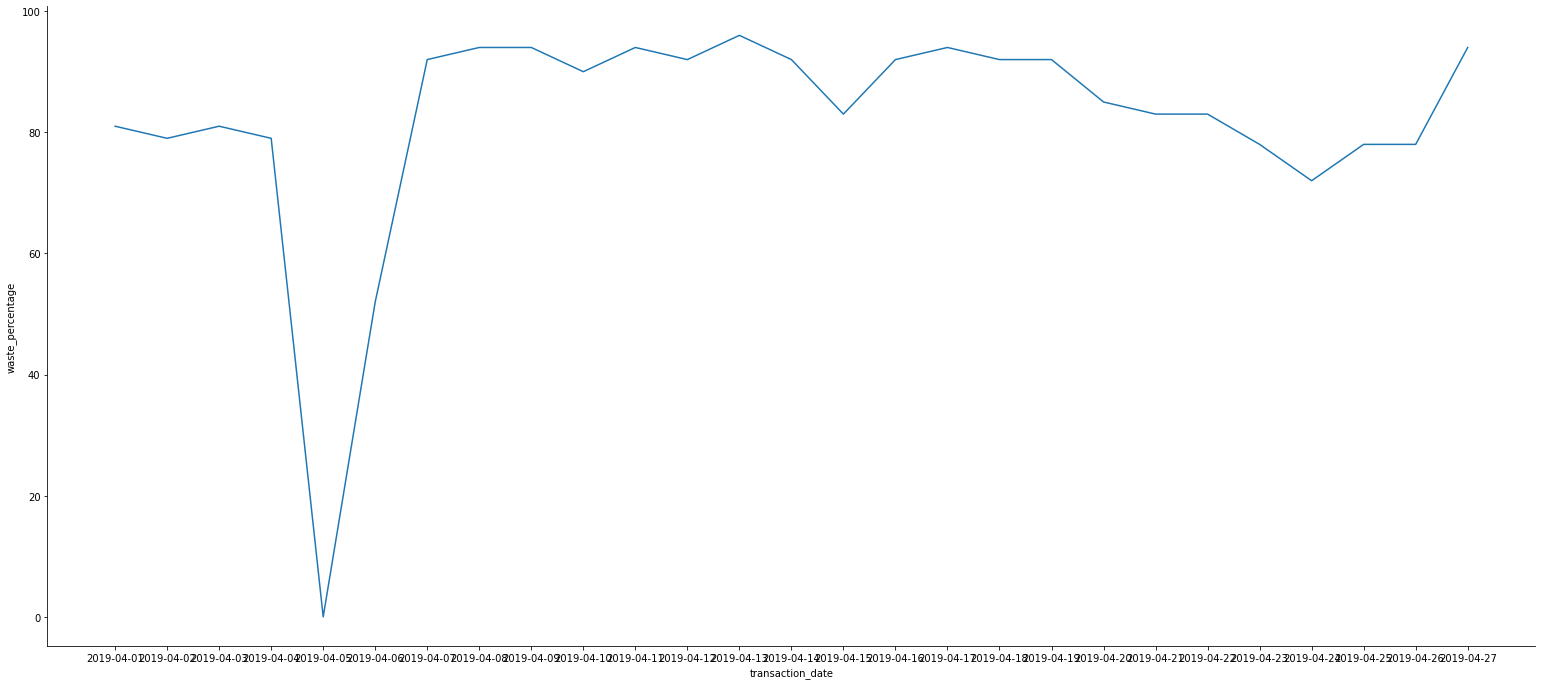

In [163]:
# membuat line plot yang menginterpretasikan frekuensi jumlah persentase tertinggi berdasarkan tanggal transaksi
graf = sns.relplot(x="transaction_date", y="waste_percentage", kind="line", data=inventory_wastebydate)
graf.fig.set_size_inches(25,10)

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
 - Persentase waste tertinggi terjadi pada tanggal 13 April 2019 dengan persentase waste sebesar 96% & jumlah waste sebanyak 46 produk
 - Terjadi kenaikan persentase waste selama bulan April 2019 di beberapa inventory outlet coffee shop

2. Produk apakah yang memiliki persentase waste tertinggi?

In [164]:
# membuat variabel yang berisikan jumlah persentase waste tertinggi berdasarkan produk
inventory_wasteprod = pd.DataFrame(data.groupby(by= ['product'], dropna=False)[['waste_percentage', 'waste']].max())

In [165]:
inventory_wasteprod

,waste_percentage,waste
product,,
Almond Croissant,94,17
Chocolate Croissant,89,16
Cranberry Scone,83,15
Ginger Scone,96,47
Hazelnut Biscotti,94,17


In [166]:
# mencari rata-rata dari persentase waste tertinggi
inventory_wasteprod.mean()

waste_percentage    91.2
waste               22.4
dtype: float64

In [167]:
inventory_wasteprod = inventory_wasteprod.reset_index()

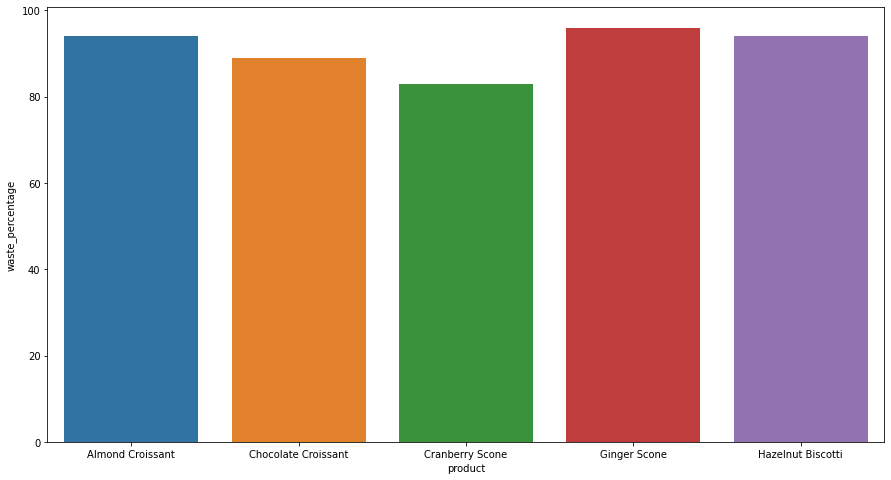

In [168]:
# membuat barplot yang menginterpretasikan frekuensi jumlah waste tertinggi berdasarkan produk
plt.figure(figsize=(15,8))
graf2 = sns.barplot(data=inventory_wasteprod, x='product', y='waste_percentage')
plt.show()

> Berdasarkan temuan di atas, dapat diketahui bahwa:
 - Produk yang memiliki persentase waste tertinggi yakni produk Ginger Scone dengan persentase waste sebesar 96% & jumlah waste sebanyak 47 buah produk
 - Lalu, persentase waste tertinggi disusul dengan produk Almond Croissant & Hazelnut Biscotti yang sama-sama memiliki persentase waste sebesar 94% & jumlah waste sebanyak 17 buah produk
 - Rata-rata persentase waste tertinggi dari masing-masing produk sebesar 91.2% 

3. Berapakah persentase waste tertinggi berdasarkan store city & address?

In [169]:
# membuat variabel yang berisikan jumlah persentase waste tertinggi berdasarkan store city & store address
inventory_wasteoutlet = pd.DataFrame(data.groupby(by= ['store_city', 'store_address'], dropna=True)[['waste_percentage', 'waste']].max())

In [170]:
inventory_wasteoutlet

waste_percentage  waste
store_city       store_address                             
Long Island City 32-20 Broadway                   94     44
New York         100 Church Street                94     45
                 687 9th Avenue                   96     47

In [171]:
# mereset index variabel
inventory_wasteoutlet = inventory_wasteoutlet.reset_index()

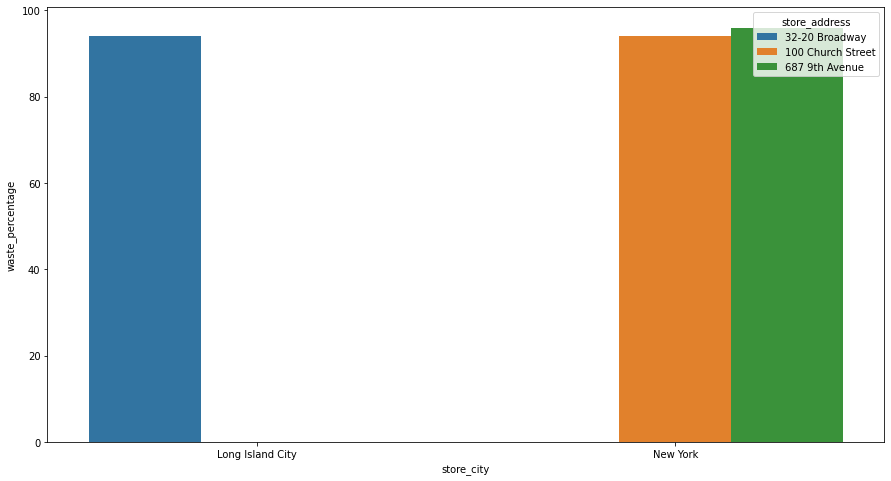

In [172]:
# membuat barplot yang menginterpretasikan frekuensi jumlah persentase waste tertinggi berdasarkan store city & store address
plt.figure(figsize=(15,8))
graf3 = sns.barplot(data=inventory_wasteoutlet, x='store_city', y='waste_percentage', hue='store_address')
plt.show()

> Berdasarkan temuan di atas, dapat diketahui bahwa:
- Persentase waste tertinggi berdasarkan store city & address yakni store di New York dengan alamat 687 9th Avenue, dengan persentase waste sebesar 96% & jumlah waste sebanyak 47 buah produk

4. Berapa banyak nilai kerugian yang dimiliki oleh produk dengan persentase waste tertinggi?

In [173]:
# membuat variabel yang berisikan jumlah total kerugian & persentase waste tertinggi
inventory_wastevalue = pd.DataFrame(data.groupby(by= ['product'], dropna=True)[['waste_percentage', 'waste_value']].max())

In [174]:
inventory_wastevalue

,waste_percentage,waste_value
product,,
Almond Croissant,94,63.75
Chocolate Croissant,89,60.00
Cranberry Scone,83,48.75
Ginger Scone,96,152.75
Hazelnut Biscotti,94,63.00


In [175]:
# mencari rata-rata kerugian dari persentase waste tertinggi
inventory_wastevalue.mean()

waste_percentage    91.20
waste_value         77.65
dtype: float64

In [176]:
# mereset index variabel
inventory_wastevalue = inventory_wastevalue.reset_index()

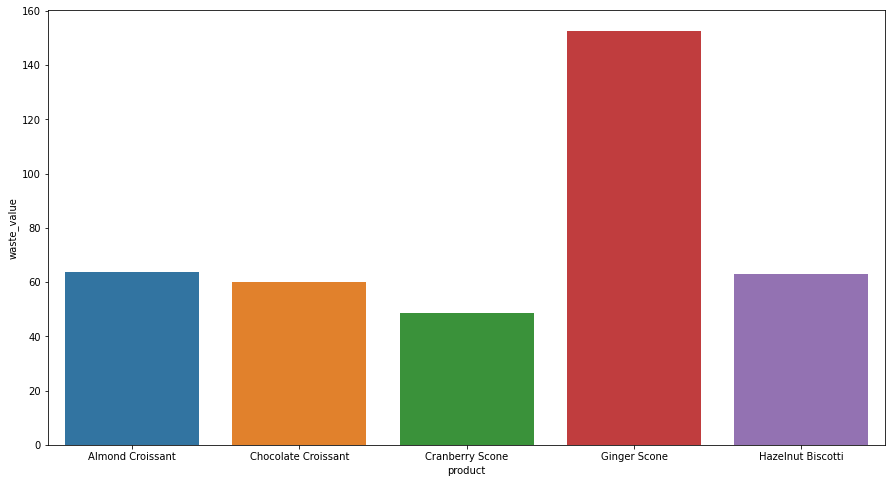

In [177]:
# membuat barplot yang menginterpretasikan frekuensi total kerugian dari masing-masing produk dengan persentase waste tertinggi
plt.figure(figsize=(15,8))
graf4 = sns.barplot(data=inventory_wastevalue, x='product', y='waste_value')
plt.show()

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
- Nilai kerugian yang dimiliki oleh produk dengan persentase waste tertinggi yakni produk Ginger Scone dengan persentase waste sebesar 96% memiliki nilai kerugian sebesar $152.75
- Range nilai kerugian yang dimiliki oleh masing-masing produk dengan persentase waste tertinggi yakni sebesar 48.75 - 152.75 dollar, dengan rata-rata kerugian yang dihasilkan oleh masing-masing produk dengan persentase waste tertinggi yakni sebesar 77.65

## 3. Data Pre-Processing

#### Summary Data
Melihat tipe data, rata-rata, mean, hingga minimum & maximum masing-masing nilai pada data.

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   transaction_date            307 non-null    object 
 1   store_address               307 non-null    object 
 2   store_city                  307 non-null    object 
 3   product                     307 non-null    object 
 4   current_wholesale_price     307 non-null    float64
 5   start_of_day                307 non-null    int64  
 6   quantity_sold               307 non-null    int64  
 7   waste                       307 non-null    int64  
 8   current_retail_price_value  307 non-null    float64
 9   waste_percentage            307 non-null    int64  
 10  sold_value                  307 non-null    float64
 11  target_trx                  307 non-null    float64
 12  waste_value                 307 non-null    float64
dtypes: float64(5), int64(4), object(4)


In [179]:
data.describe()

,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage,sold_value,target_trx,waste_value
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,2.274951,24.058632,9.296417,14.657980,3.498371,58.107492,32.258143,82.661238,50.403094
std,0.147357,12.063414,5.440115,11.202108,0.223235,20.859431,17.985252,37.102942,35.370930
min,2.110000,18.000000,0.000000,0.000000,3.250000,0.000000,0.000000,58.500000,0.000000
25%,2.110000,18.000000,6.000000,8.000000,3.250000,44.000000,21.000000,63.000000,29.250000
50%,2.280000,18.000000,8.000000,11.000000,3.500000,58.000000,29.250000,67.500000,38.500000
75%,2.440000,18.000000,11.000000,15.000000,3.750000,72.000000,38.500000,67.500000,55.750000
max,2.440000,48.000000,32.000000,47.000000,3.750000,96.000000,104.000000,156.000000,152.750000


#### Missing Value

Missing value adalah data yang hilang, atau nilai yang hilang, terjadi ketika tidak ada nilai data yang disimpan untuk variabel dalam pengamatan. Kita ingin melakukan identifikasi, apakah terdapat data yang missing atau tidak dalam observasi pengamatan.

In [180]:
data.isna().sum()

transaction_date              0
store_address                 0
store_city                    0
product                       0
current_wholesale_price       0
start_of_day                  0
quantity_sold                 0
waste                         0
current_retail_price_value    0
waste_percentage              0
sold_value                    0
target_trx                    0
waste_value                   0
dtype: int64

#### Duplicated Data

Melakukan identifikasi, apakah terdapat data/observasi yang sama atau tidak, apabila ada data yang terduplikasi maka data duplikasi harus dihapus.

In [181]:
data[data.duplicated()]

,transaction_date,store_address,store_city,product,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage,sold_value,target_trx,waste_value


#### Label Encoder

In [182]:
# Mengubah data kategorikal kedalam bentuk numerik
kategori = ['transaction_date', 'store_address', 'store_city', 'product']

encoded_data = LabelEncoder()


for feature in kategori:
        if feature in data.columns.values:
            data[feature] = encoded_data.fit_transform(data[feature])

data

,transaction_date,store_address,store_city,product,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage,sold_value,target_trx,waste_value
0,0,1,0,4,2.28,18,8,10,3.50,56,28.00,63.0,35.00
1,0,1,0,2,2.11,18,12,6,3.25,33,39.00,58.5,19.50
2,0,1,0,1,2.44,18,8,10,3.75,56,30.00,67.5,37.50
3,0,1,0,3,2.11,48,9,39,3.25,81,29.25,156.0,126.75
4,0,1,0,0,2.44,18,9,9,3.75,50,33.75,67.5,33.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,26,2,1,4,2.28,18,1,17,3.50,94,3.50,63.0,59.50
303,26,2,1,2,2.11,18,4,14,3.25,78,13.00,58.5,45.50
304,26,2,1,1,2.44,18,2,16,3.75,89,7.50,67.5,60.00
305,26,2,1,3,2.11,48,19,29,3.25,60,61.75,156.0,94.25


#### Memilih Feature Untuk Dimodelkan 

In [183]:
# pemilihan features berikut untuk digunakan dalam melakukan pemodelan machine learning, didasarkan percobaan & penelitian yang telah dilakukan sebelumnya
data_filter = data[['transaction_date', 'store_city', 'start_of_day', 'quantity_sold', 'waste_percentage', 'waste']]

In [184]:
data_filter

,transaction_date,store_city,start_of_day,quantity_sold,waste_percentage,waste
0,0,0,18,8,56,10
1,0,0,18,12,33,6
2,0,0,18,8,56,10
3,0,0,48,9,81,39
4,0,0,18,9,50,9
...,...,...,...,...,...,...
302,26,1,18,1,94,17
303,26,1,18,4,78,14
304,26,1,18,2,89,16
305,26,1,48,19,60,29


## 4. Uji Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

#### Uji Nomalitas Data

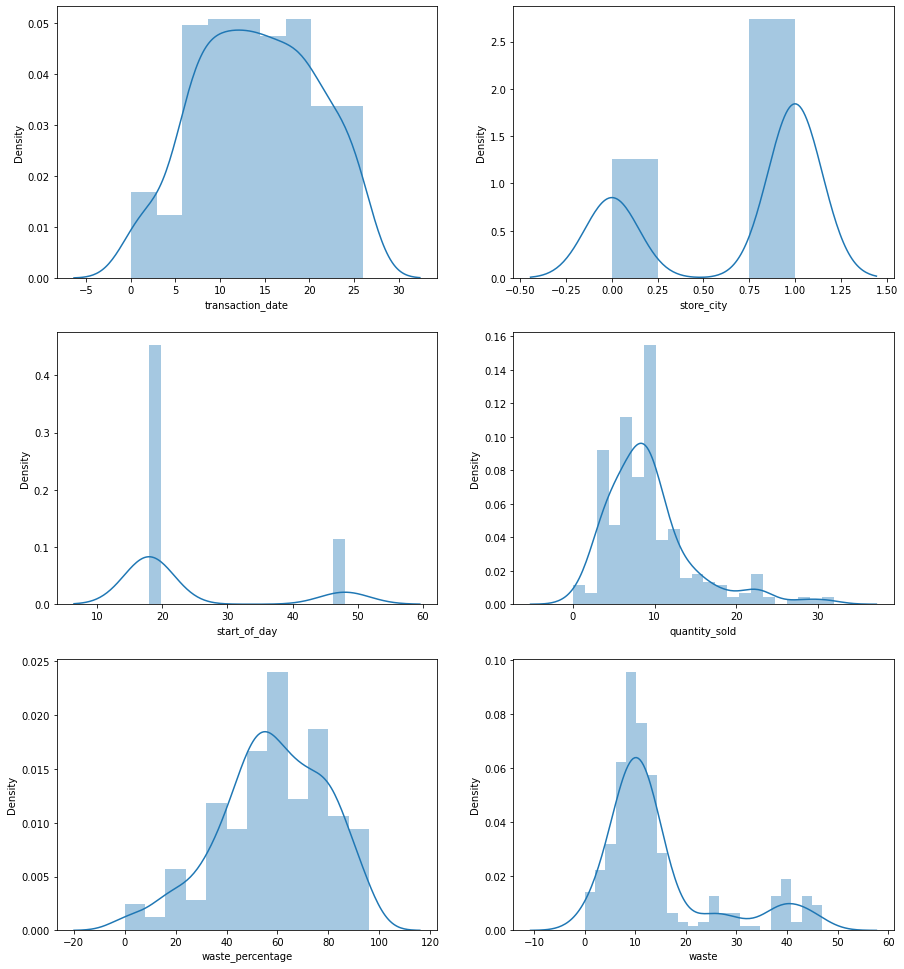

In [185]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 2, figsize=(15, 17))

sns.distplot(data_filter['transaction_date'], ax=axes[0, 0])
sns.distplot(data_filter['store_city'], ax=axes[0, 1])
sns.distplot(data_filter['start_of_day'], ax=axes[1, 0])
sns.distplot(data_filter['quantity_sold'], ax=axes[1, 1])
sns.distplot(data_filter['waste_percentage'], ax=axes[2, 0])
sns.distplot(data_filter['waste'], ax=axes[2, 1])
plt.show()

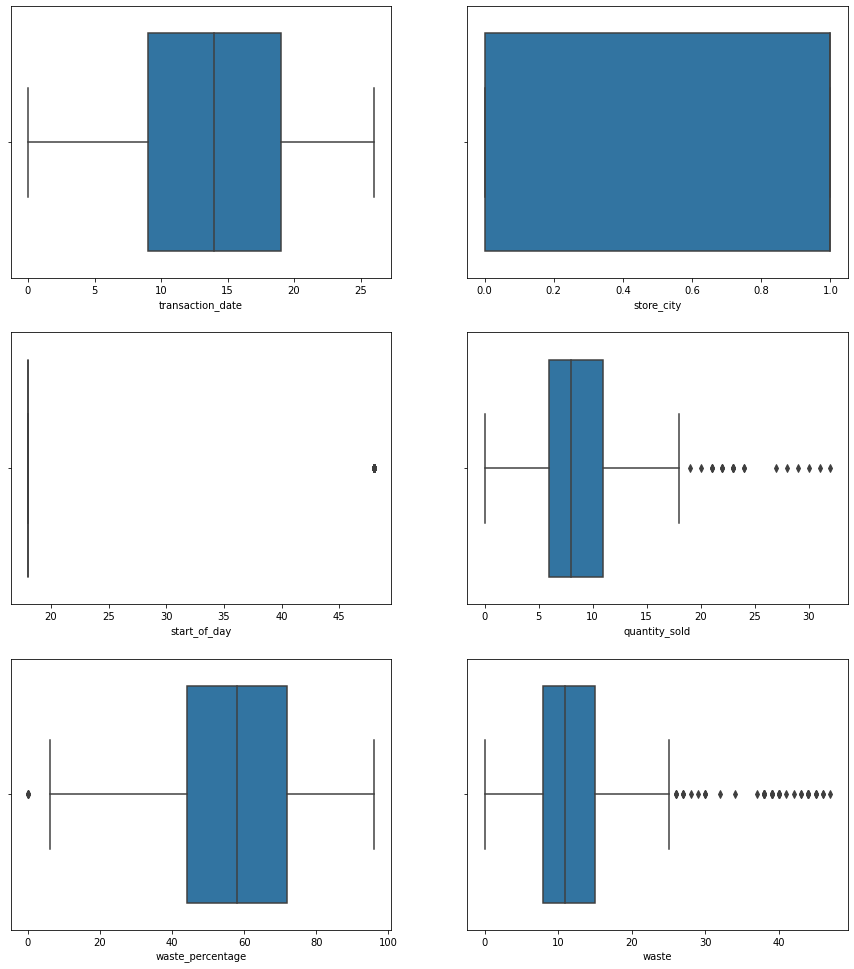

In [186]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 17))

sns.boxplot(data_filter['transaction_date'], ax=axes[0, 0])
sns.boxplot(data_filter['store_city'], ax=axes[0, 1])
sns.boxplot(data_filter['start_of_day'], ax=axes[1, 0])
sns.boxplot(data_filter['quantity_sold'], ax=axes[1, 1])
sns.boxplot(data_filter['waste_percentage'], ax=axes[2, 0])
sns.boxplot(data_filter['waste'], ax=axes[2, 1])
plt.show()

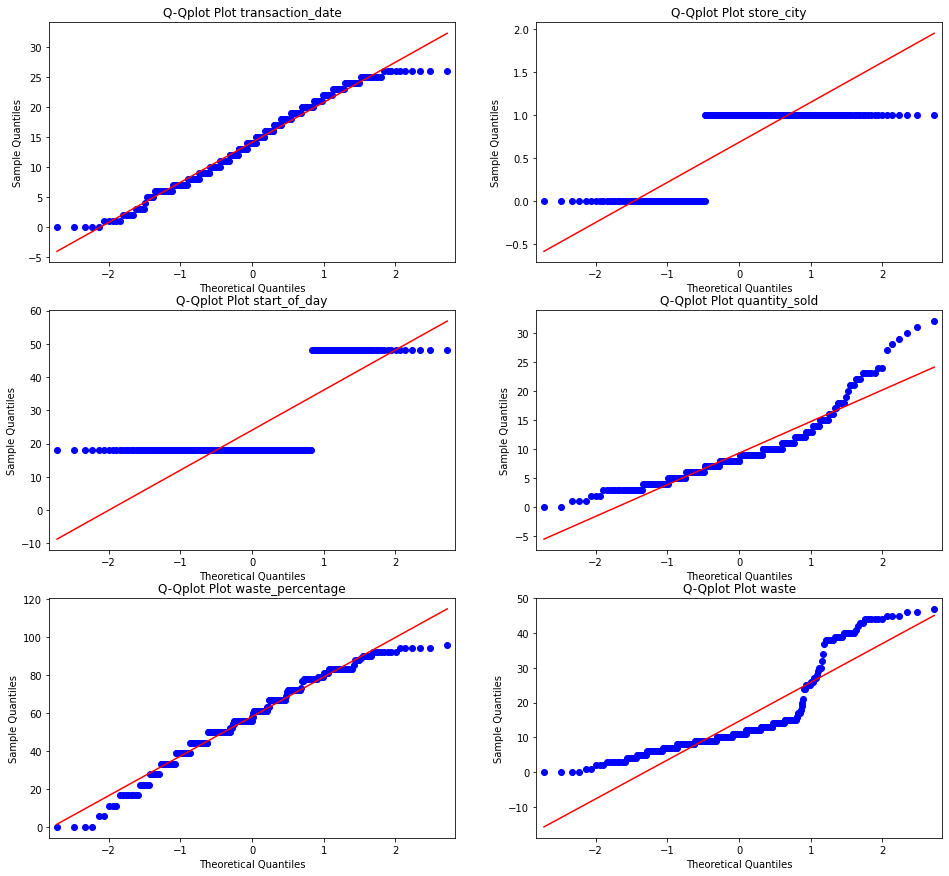

In [187]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(3, 2, figsize=(16, 15))

sm.graphics.qqplot(data_filter['transaction_date'].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot transaction_date')

sm.graphics.qqplot(data_filter['store_city'].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot store_city')

sm.graphics.qqplot(data_filter['start_of_day'].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot start_of_day')

sm.graphics.qqplot(data_filter['quantity_sold'].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot quantity_sold')

sm.graphics.qqplot(data_filter['waste_percentage'].dropna(), line='s', ax=axes[2, 0])
axes[2, 0].title.set_text('Q-Qplot Plot waste_percentage')

sm.graphics.qqplot(data_filter['waste'].dropna(), line='s', ax=axes[2, 1])
axes[2, 1].title.set_text('Q-Qplot Plot waste')

plt.show()

#### Uji Linearitas Data

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

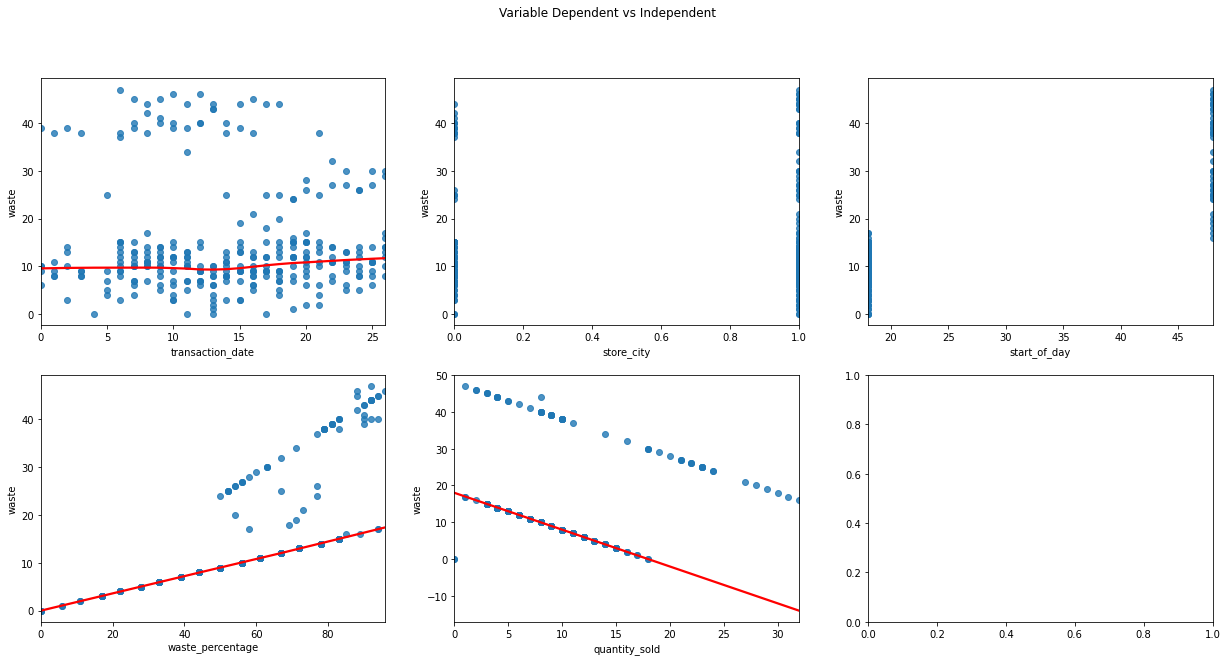

In [188]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(2, 3, figsize=(21, 10))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=data_filter["transaction_date"], y=data_filter["waste"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,0])
sns.regplot(x=data_filter["store_city"], y=data_filter["waste"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,1])
sns.regplot(x=data_filter["start_of_day"], y=data_filter["waste"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,2])
sns.regplot(x=data_filter["quantity_sold"], y=data_filter["waste"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,1])
sns.regplot(x=data_filter["waste_percentage"], y=data_filter["waste"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,0])

plt.show()

####Uji Multikolinearitas


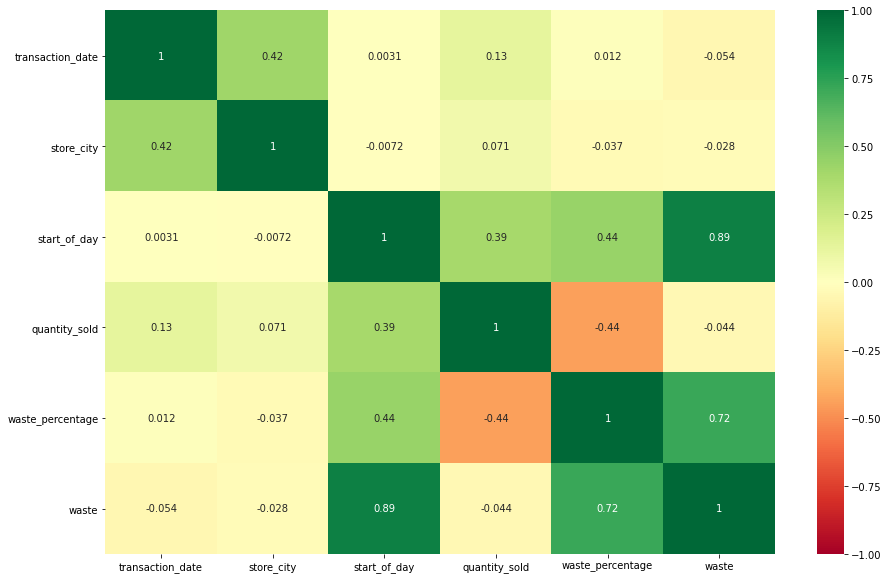

In [189]:
plt.figure(figsize=(15,10))
sns.heatmap(data_filter.corr(), vmax=1, vmin=-1, center=0, cmap="RdYlGn", annot=True)

In [190]:
# Cek Urutan korelasi terendah ke tertinggi
data_filter.corr()["waste"].sort_values()

transaction_date   -0.054140
quantity_sold      -0.043859
store_city         -0.028302
waste_percentage    0.717346
start_of_day        0.893224
waste               1.000000
Name: waste, dtype: float64

## 5. Data Engineering

####Scaling

In [191]:
# Scale data
scaler = StandardScaler()
scaled_data_filter = scaler.fit_transform(data_filter)
scaled_data_filter

array([[-2.12133812, -1.47137638, -0.50305191, -0.23869595, -0.101198  ,
        -0.41649174],
       [-2.12133812, -1.47137638, -0.50305191,  0.49778301, -1.20561696,
        -0.77415039],
       [-2.12133812, -1.47137638, -0.50305191, -0.23869595, -0.101198  ,
        -0.41649174],
       ...,
       [ 1.78466439,  0.67963576, -0.50305191, -1.3434144 ,  1.48340312,
         0.11999622],
       [ 1.78466439,  0.67963576,  1.98786642,  1.7866212 ,  0.09087486,
         1.28238681],
       [ 1.78466439,  0.67963576, -0.50305191, -0.97517492,  0.95520275,
        -0.0588331 ]])

In [192]:
# Membuat dataframe dari hasil scalling
scaled_data_filter = pd.DataFrame(scaled_data_filter, columns=data_filter.columns)
scaled_data_filter

,transaction_date,store_city,start_of_day,quantity_sold,waste_percentage,waste
0,-2.121338,-1.471376,-0.503052,-0.238696,-0.101198,-0.416492
1,-2.121338,-1.471376,-0.503052,0.497783,-1.205617,-0.774150
2,-2.121338,-1.471376,-0.503052,-0.238696,-0.101198,-0.416492
3,-2.121338,-1.471376,1.987866,-0.054576,1.099257,2.176533
4,-2.121338,-1.471376,-0.503052,-0.054576,-0.389307,-0.505906
...,...,...,...,...,...,...
302,1.784664,0.679636,-0.503052,-1.527534,1.723494,0.209411
303,1.784664,0.679636,-0.503052,-0.975175,0.955203,-0.058833
304,1.784664,0.679636,-0.503052,-1.343414,1.483403,0.119996
305,1.784664,0.679636,1.987866,1.786621,0.090875,1.282387


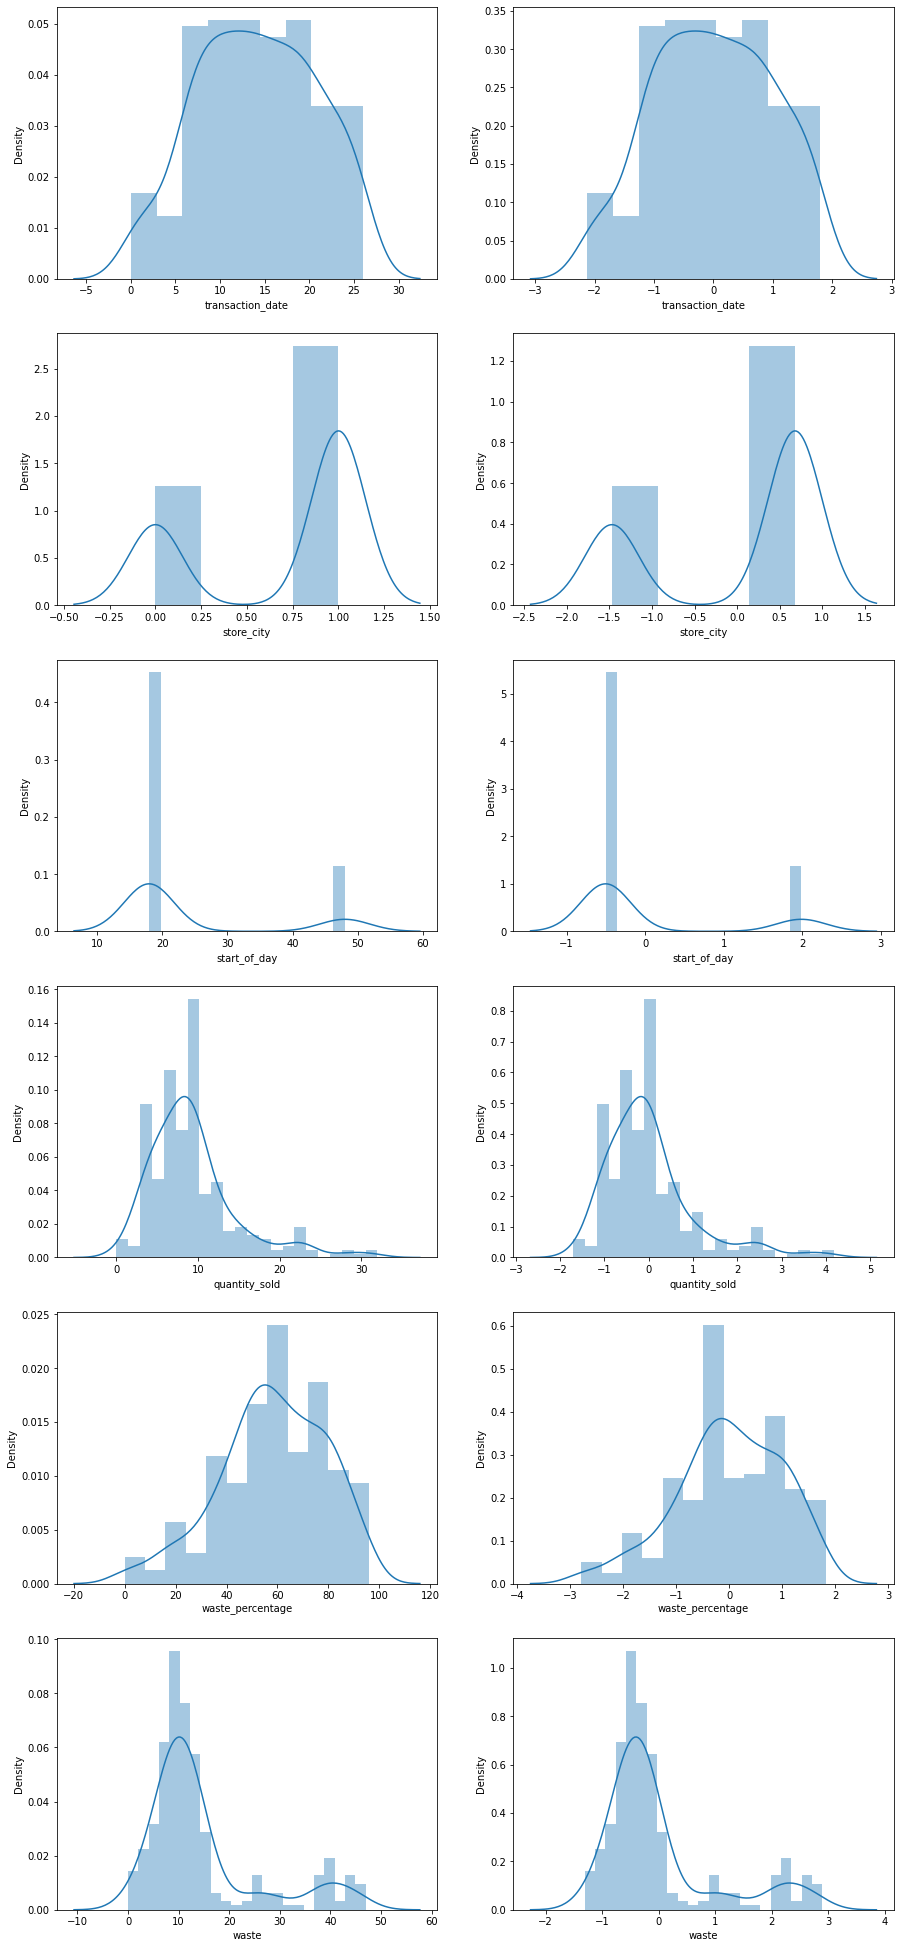

In [193]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(6, 2, figsize=(15, 35))

sns.distplot(data_filter['transaction_date'], ax=axes[0, 0])
sns.distplot(scaled_data_filter['transaction_date'], ax=axes[0, 1])

sns.distplot(data_filter['store_city'], ax=axes[1, 0])
sns.distplot(scaled_data_filter['store_city'], ax=axes[1, 1])

sns.distplot(data_filter['start_of_day'], ax=axes[2, 0])
sns.distplot(scaled_data_filter['start_of_day'], ax=axes[2, 1])

sns.distplot(data_filter['quantity_sold'], ax=axes[3, 0])
sns.distplot(scaled_data_filter['quantity_sold'], ax=axes[3, 1])

sns.distplot(data_filter['waste_percentage'], ax=axes[4, 0])
sns.distplot(scaled_data_filter['waste_percentage'], ax=axes[4, 1])

sns.distplot(data_filter['waste'], ax=axes[5, 0])
sns.distplot(scaled_data_filter['waste'], ax=axes[5, 1])
plt.show()

## 6. Membangun Model Regresi

####Train Test Split

In [194]:
X = scaled_data_filter.drop("waste", axis=1).values
y = scaled_data_filter["waste"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [195]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  214
Ukuran X test  93
Ukuran y train  214
Ukuran y test  93


### Membangun model dengan package Statsmodels

In [196]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [197]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [198]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4417.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):          5.89e-209
Time:                        08:29:55   Log-Likelihood:                 197.09
No. Observations:                 214   AIC:                            -382.2
Df Residuals:                     208   BIC:                            -362.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.007      0.172      0.8

In [199]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.9906702686210205
adjusted coefficient of determination: 0.9904459962321027
regression coefficients: [ 0.00114946 -0.01803549  0.01651736  1.01384319 -0.41149961  0.08601736]


In [200]:
# membuat list
list_columns = []

for i in data_filter.columns:
  if i != "waste":
    list_columns.append(i)

In [201]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_waste"] = y_test
df_statsmod["prediction_waste"] = prediction_1
df_statsmod

,transaction_date,store_city,start_of_day,quantity_sold,waste_percentage,actual_waste,prediction_waste
0,-0.168337,-1.471376,-0.503052,-0.238696,-0.101198,-0.416492,-0.440615
1,0.132125,0.679636,-0.503052,-0.054576,-0.389307,-0.505906,-0.511053
2,1.484203,0.679636,-0.503052,0.129544,-0.677417,-0.595321,-0.635986
3,-0.468799,0.679636,-0.503052,0.681903,-1.445708,-0.863565,-0.894144
4,1.484203,0.679636,-0.503052,-0.791055,0.667093,-0.148248,-0.141508
...,...,...,...,...,...,...,...
88,0.582817,0.679636,-0.503052,-0.975175,0.955203,-0.058833,-0.024704
89,0.883279,0.679636,1.987866,3.996058,-0.005162,0.209411,0.367009
90,-0.919491,-1.471376,-0.503052,-0.422816,0.138893,-0.327077,-0.330650
91,-0.769260,0.679636,-0.503052,-0.238696,-0.101198,-0.416492,-0.394248


####Uji Residual Distribusi Normal

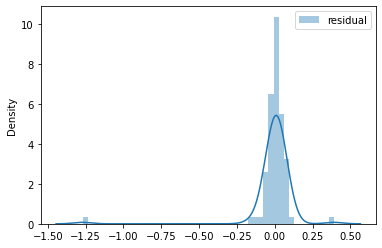

In [202]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_waste'] - df_statsmod['prediction_waste']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [203]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,transaction_date,store_city,start_of_day,quantity_sold,waste_percentage,actual_waste,prediction_waste,residual
0,-0.168337,-1.471376,-0.503052,-0.238696,-0.101198,-0.416492,-0.440615,0.024123
1,0.132125,0.679636,-0.503052,-0.054576,-0.389307,-0.505906,-0.511053,0.005146
2,1.484203,0.679636,-0.503052,0.129544,-0.677417,-0.595321,-0.635986,0.040664
3,-0.468799,0.679636,-0.503052,0.681903,-1.445708,-0.863565,-0.894144,0.030579
4,1.484203,0.679636,-0.503052,-0.791055,0.667093,-0.148248,-0.141508,-0.006739


<function matplotlib.pyplot.show>

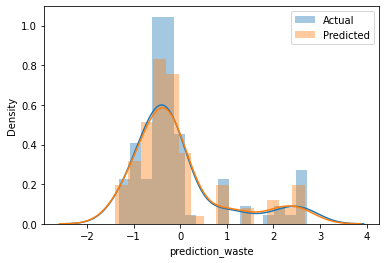

In [204]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_waste'], label="Actual")
sns.distplot(df_statsmod['prediction_waste'], label="Predicted")
plt.legend()
plt.show

####Uji No autokorelasi


Uji Durbin watson akan menghasilkan nilai Durbin Watson (DW) yang nantinya akan dibandingkan dengan dua (2) nilai Durbin Watson Tabel, yaitu Durbin Upper (DU) dan Durbin Lower DL). Dikatakan tidak terdapat autokorelasi jika nilai DW > DU dan (4-DW) > DU atau bisa dinotasikan juga sebagai berikut: (4-DW) > DU < DW.


In [205]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

1.9375980807965092

####Uji Homoskedastisitas

Uji Homoskedastisiitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain.


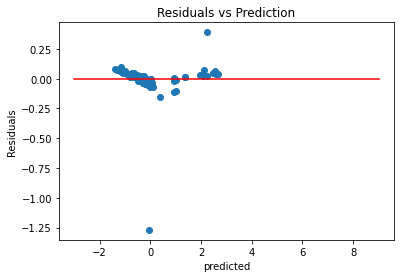

In [206]:
asm_homosk = plt.scatter(df_statsmod['prediction_waste'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot([-3,9],[0,0],color='red')
asm_homosk = plt.title('Residuals vs Prediction')

#### Evaluasi Model

In [207]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_waste'], df_statsmod['prediction_waste']))

R-square : 0.9793446382252139


In [208]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_waste'], df_statsmod['prediction_waste']))

MSE : 0.0208488238309806


### Uji Partial & Serentak Analisis Regresi

Uji Parameter T-test  memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [209]:
#t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5, t_test_X6, t_test_X7, t_test_X8, t_test_X9 = results.tvalues
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)

T-test score const:  0.1716530348091584
T-test score X1:  -2.4639653672284916
T-test score X2:  2.2343825304564993
T-test score X3:  92.05034306502901
T-test score X4:  -37.09933262274171
T-test score X5:  7.3562065483868295


In [210]:
#p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5, p_value_X6, p_value_X7, p_value_X8, p_value_X9 = results.pvalues
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)

P-value const:  0.8638771939572376
P-value X1:  0.014552296484353069
P-value X2:  0.0265218641071076
P-value X3:  1.6351280769756026e-170
P-value X4:  1.1652149381172502e-93
P-value X5:  4.295389483398553e-12


Uji kelayakan model F-test memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [211]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  4417.263638210141
P-value :  5.88893213438241e-209
Tolak H0


Dari output diatas, diperoleh p-value kurang dari 0,05 sehingga hypothesis null (H0) ditolak dan dapat disimpulkan bahwa model regresi dari kelima variabel independen dan variabel dependen waste (Y) layak digunakan.

##7. Kesimpulan & Saran

1. **Insight dari data**
- Persentase waste tertinggi terjadi pada tanggal 13 April 2019 dengan persentase waste sebesar 96% & jumlah waste sebanyak 46 produk.

- Terjadi kenaikan persentase waste inventory selama bulan April 2019 di beberapa store coffee shop.
- Produk yang memiliki persentase waste tertinggi yakni produk Ginger Scone dengan persentase waste sebesar 96% & jumlah waste sebanyak 47 buah produk. Lalu, disusul dengan produk Almond Croissant & Hazelnut Biscotti yang sama-sama memiliki persentase waste sebesar 94% & jumlah waste sebanyak 17 buah produk.Dan rata-rata persentase waste tertinggi dari masing-masing produk sebesar 91.2%.
- Persentase waste tertinggi berdasarkan store city & address yakni store di New York dengan alamat 687 9th Avenue, dengan persentase waste sebesar 96% & jumlah waste sebanyak 47 buah produk.
- Nilai kerugian yang dimiliki oleh produk dengan persentase waste tertinggi yakni produk Ginger Scone dengan persentase waste sebesar 96% memiliki nilai kerugian sebesar $152.75. Adapun range nilai kerugian yang dimiliki oleh masing-masing produk dengan persentase waste tertinggi yakni sebesar 48.75 - 152.75 dollar, dengan rata-rata kerugian yang dihasilkan oleh masing-masing produk dengan persentase waste tertinggi yakni sebesar 77.65.
- Berdasarkan heatmap korelasi didapatkan bahwa, variabel feature yang paling mempengaruhi nilai waste yakni merupakan variabel feature start_of_day / target penjualan produk & quantity_sold / jumlah produk yang terjual. Semakin banyak start_of_day & semakin sedikit quantity_sold dari sebuah produk akan menghasilkan nilai waste yang banyak.

2. **Hasil model machine learning**
- Berdasarkan uji distribusi normal pada residual terlihat bahwa residual membentuk kurva lonceng / berdistribusi normal, meskipun terdapat tail.
- Berdasarkan uji homoskedatisitas dapat dilihat juga tidak ada pola penyebaran yang jelas / pola yang menunjukkan heteroskedatisitas.
- Berdasarkan uji no-autokorelasi, didapatkan juga hasil nilai Durbin-Watson yakni 1,937, yang menunjukkan tidak adanya autokorelasi & asumsi puas.
- Berdasarkan hasil skor evaluasi model menggunakan R-square didapatkan nilai 0,979, yang mana nilai yang sangat baik (semakin tinggi / mendekati nilai 1, semakin akurat model yang dibangun)
- Berdasarkan hasil skor evaluasi model menggunakan MSE didapatkan nilai 0,020, yang mana nilai yang sangat baik (rata-rata error forecast yang semakin kecil, menandakan peramalan / prediksi semakin baik).
- Berdasarkan hasil nilai dari f-test score yang tinggi & p-value yang sangat rendah, hasil evaluasi akhir model didapatkan hasil H0 ditolak, yang berarti **model regresi diatas layak & dapat digunakan**.

> **REKOMENDASI:**
- Untuk dapat meminimalisir waste yang dihasilkan oleh tiap-tiap inventory dari store, harus **menetapkan target penjualan (start of day) yang jauh lebih sedikit** untuk tiap produk, khususnya Ginger Scone, Almond Croissant, & Hazelnut Biscotti untuk seluruh store.